In [1]:
from sklearn import datasets
import numpy as np
import math
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.decomposition import PCA
import seaborn as sns

from CC import CategoricalClassification

In [2]:
#Loading Scipy Iris dataset
iris = datasets.load_iris()
irisX = iris.data
irisY = iris.target

irisT = np.transpose(irisX)

#Iris feature set values & their respective probabilities
unique_val = []
val_prob = []
for feature in irisT:
    unique, count = np.unique(feature, return_counts=True)
    unique_val.append(unique)
    val_prob.append(count/150)

print(irisX.shape)

(150, 4)


In [3]:
cc = CategoricalClassification()

c = [
        5, 
        (0, [unique_val[0], val_prob[0]]), 
        (1, [unique_val[1], val_prob[1]]), 
        (2, [unique_val[2], val_prob[2]]),
        (3, [unique_val[3], val_prob[3]])
    ] 

X = cc.generate_data(4, 150, cardinality=c, ensure_rep=True, seed=42)
y = cc.generate_labels(X, n=3, class_relation='linear')

print(X.shape)

(150, 4)


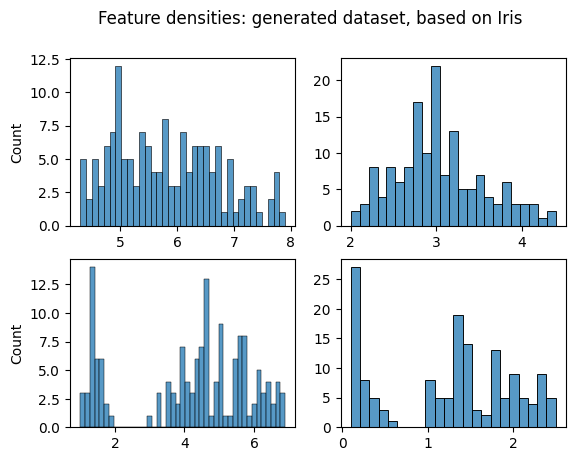

In [4]:
Xt = X.T
fig, axes = plt.subplots(2,2)
sns.histplot(Xt[0], bins=len(np.unique(Xt[0])), ax=axes[0][0])
sns.histplot(Xt[1], bins=len(np.unique(Xt[1])), ax=axes[0][1]).set(ylabel=None)
sns.histplot(Xt[2], bins=len(np.unique(Xt[2])), ax=axes[1][0])
sns.histplot(Xt[3], bins=len(np.unique(Xt[3])), ax=axes[1][1]).set(ylabel=None)

fig.suptitle("Feature densities: generated dataset, based on Iris")
plt.show()

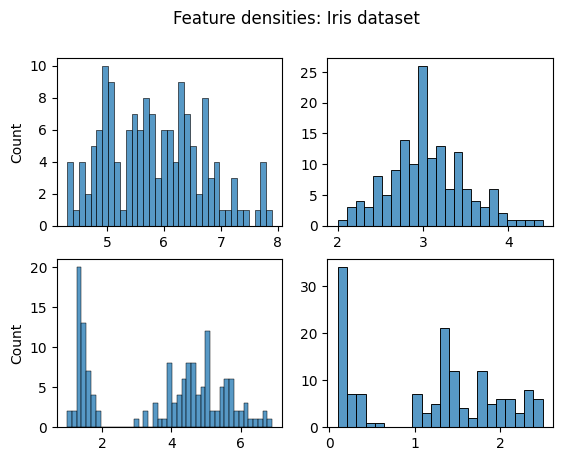

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.histplot(irisT[0], bins=len(np.unique(irisT[0])), ax=axes[0][0])
sns.histplot(irisT[1], bins=len(np.unique(irisT[1])), ax=axes[0][1]).set(ylabel=None)
sns.histplot(irisT[2], bins=len(np.unique(irisT[2])), ax=axes[1][0])
sns.histplot(irisT[3], bins=len(np.unique(irisT[3])), ax=axes[1][1]).set(ylabel=None)


plt.suptitle("Feature densities: Iris dataset")
plt.show()

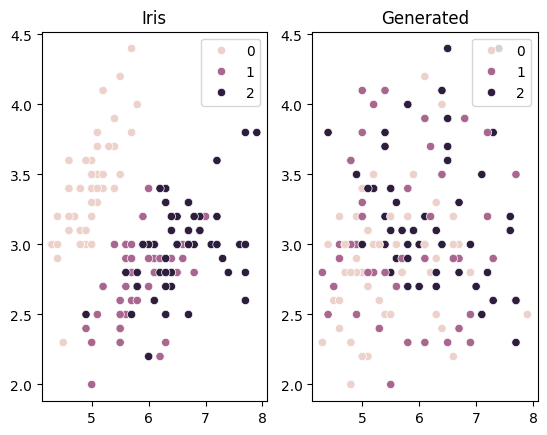

In [6]:
fig, axes = plt.subplots(1, 2)

sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=iris.target, ax=axes[0])
axes[0].set_title("Iris")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axes[1])
axes[1].set_title("Generated")

plt.show()

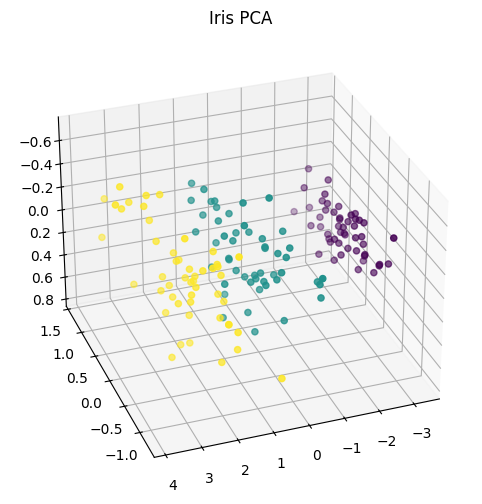

In [7]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=20,
)
ax.set_title("Iris PCA")
plt.show()

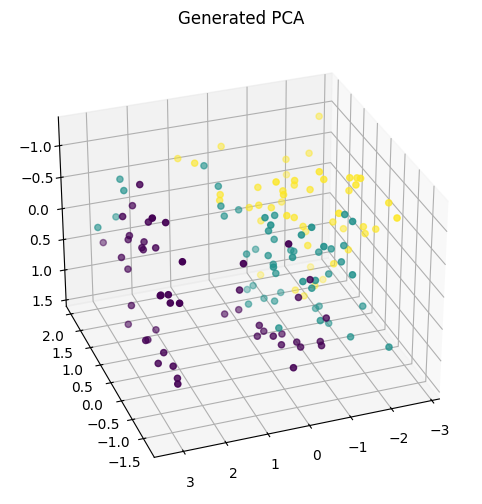

In [8]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    s=20,
)
ax.set_title("Generated PCA")
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
iX_train, iX_test, iy_train, iy_test = train_test_split(irisX, irisY, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Iris Classification Report:")
iRFC = RandomForestClassifier()
iRFC.fit(iX_train, iy_train)
iy_pred = iRFC.predict(iX_test)
print(classification_report(iy_test, iy_pred))

print("Generated Classification Report:")
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

Iris Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Generated Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.83      0.83        12
           2       1.00      0.90      0.95        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

